In [1]:
import tensorflow as tf 
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_x_no_stratified.pcl", 'rb'))
y = np.array(pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_y_no_stratified.pcl", 'rb')))

In [3]:
print(X[:,:,1].shape)
unq, cnt = np.unique(y, return_counts=True)
print(unq, cnt)
print(len(y))
print(y[0])

(17116, 1000)
['A' 'N'] [7588 9528]
17116
N


In [4]:
for i in range(len(y)):
    if y[i]=="N":
        y[i] = 0
    else:
        y[i] = 1


X_train, X_test, y_train, y_test = train_test_split(X[:,:,1], y, random_state=1)
layer = tf.keras.layers.CategoryEncoding(num_tokens=2, output_mode="one_hot")
y_train = layer(y_train.astype(np.int32))
# y_test = layer(y_test.astype(np.int32))
print("Before ",X_train.shape, X_test.shape)
X_train = np.stack((X_train, X_train, X_train), axis=-1)
X_test = np.stack((X_test, X_test, X_test), axis=-1)
print("After ",X_train.shape, X_test.shape)


Before  (12837, 1000) (4279, 1000)
After  (12837, 1000, 3) (4279, 1000, 3)


In [5]:
#data generation
print(X_train.shape, X_test.shape)
unq, cnt = np.unique(y_train, return_counts=True)
print(unq, cnt)
# print(tmp)

(12837, 1000, 3) (4279, 1000, 3)
[0. 1.] [12837 12837]


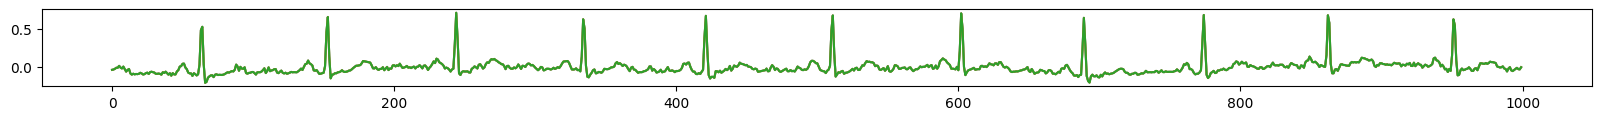

tf.Tensor([1. 0.], shape=(2,), dtype=float32)


In [6]:

# tmp = np.stack((X_train[0], X_train[0]), axis=1)
# print(tmp.shape)
plt.figure(figsize=(20,1))
plt.plot(X_train[0])
plt.show()
print(y_train[0])

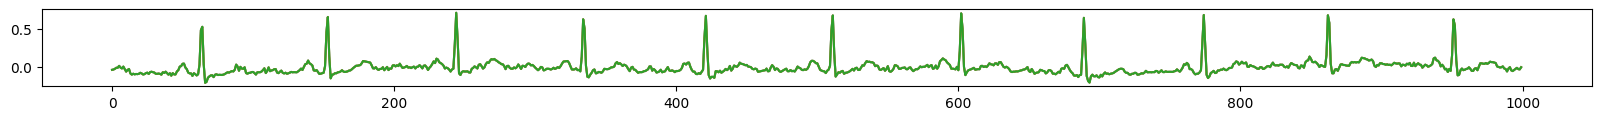

In [7]:
plt.figure(figsize=(20,1))
plt.plot(X_train[0])
plt.show()

In [13]:
#define model
model = Sequential()
model.add(Conv2D(16, (100,2), input_shape=(1000,3,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(50,2)))

# model.add(Conv2D(64, (50,1)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(50,1)))

model.add(Flatten())
# model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 901, 2, 16)        3216      
                                                                 
 activation_4 (Activation)   (None, 901, 2, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 1, 16)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dropout_2 (Dropout)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 578       
                                                      

In [9]:
# model = Sequential()
# model.add(Dense(1))
# model.add(Activation('relu'))
# model.add(Dense(2))
# model.add(Flatten())
# model.add(Activation('softmax'))
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
epoch = 10
validation_step = 10
batch_size = 10
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, validation_steps=validation_step, verbose=1)

Epoch 1/10
321/321 [==============================] - 14s 43ms/step - loss: 0.3609 - accuracy: 0.8515 - val_loss: 0.3514 - val_accuracy: 0.8540
Epoch 2/10
321/321 [==============================] - 13s 41ms/step - loss: 0.3619 - accuracy: 0.8486 - val_loss: 0.3528 - val_accuracy: 0.8575
Epoch 3/10
321/321 [==============================] - 13s 40ms/step - loss: 0.3591 - accuracy: 0.8510 - val_loss: 0.3490 - val_accuracy: 0.8551
Epoch 4/10
321/321 [==============================] - 13s 40ms/step - loss: 0.3608 - accuracy: 0.8515 - val_loss: 0.3736 - val_accuracy: 0.8372
Epoch 5/10
321/321 [==============================] - 13s 40ms/step - loss: 0.3577 - accuracy: 0.8494 - val_loss: 0.3549 - val_accuracy: 0.8567
Epoch 6/10
321/321 [==============================] - 13s 41ms/step - loss: 0.3553 - accuracy: 0.8488 - val_loss: 0.3586 - val_accuracy: 0.8512
Epoch 7/10
321/321 [==============================] - 14s 43ms/step - loss: 0.3628 - accuracy: 0.8479 - val_loss: 0.3552 - val_accuracy:

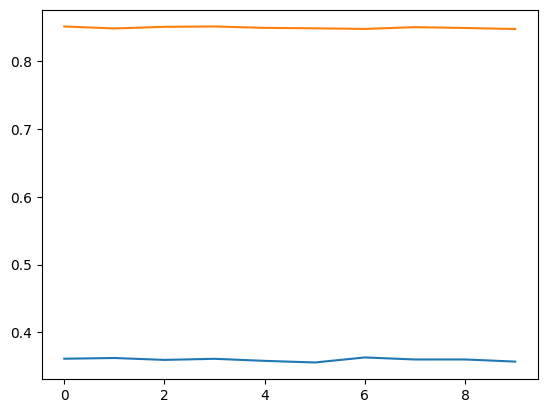

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('C:/Users/sanda/Documents/esp_dev_files/tensor_test_3_cnn/src/cnn_ptb_model_2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\sanda\AppData\Local\Temp\tmpp1ngnx40\assets


The accuracy of the model is 0.8476279504557139


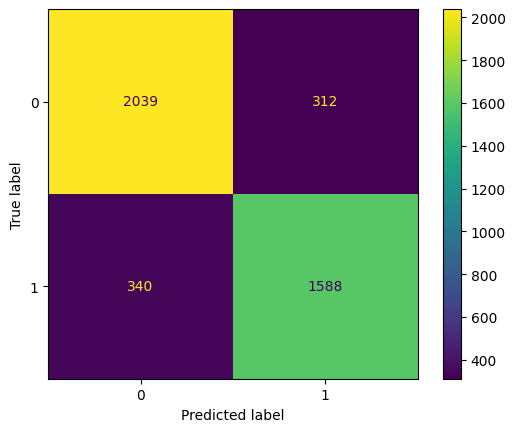

In [18]:
# model.save("/Users/sanda/Documents/esp_dev_files/ecg_project_2/ptb_models_test/cnn_ptb_model_2.h5")
pred = model.predict(X_test)
pred_nohe = np.array([i.argmax() for i in pred])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.astype(np.int), pred_nohe))
print(f'The accuracy of the model is {accuracy_score(y_test.astype(np.int), pred_nohe )}')
disp.plot()

In [ ]:
#xxd -i cnn_ptb_model_2.tflite > models/cnn_ptb_model_1.cc 